# simple linear regression


1 esc + y - conert cell to code 

2 esc+m - convert to markdown

3 shift+enter - execute code

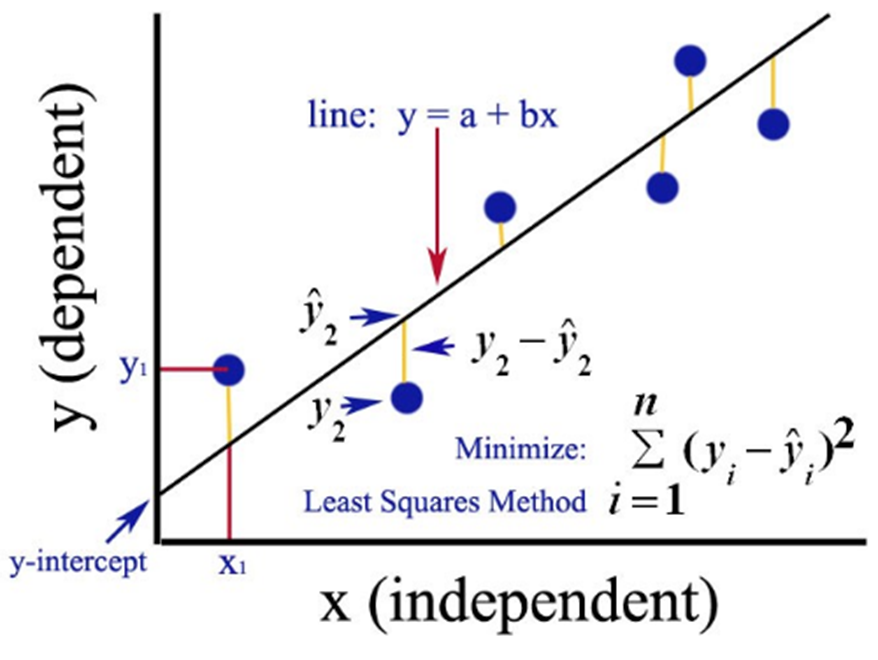

from warnings import filterwarnings

In [1]:
# ignore non harmful warnings
from warnings import filterwarnings 

In [2]:
filterwarnings("ignore")

# Step 1 : Data Ingestion

In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv("50_Startups.csv")

In [5]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Problem statement - 
Estimate profit for startups 

For student who are unable to see suggestion
Command Pallete -> Ctrl + Shift + P
Search Python: Restart Language Server

# Step 2 - Perform basic data quality checks

In [6]:
df.shape

(50, 5)

In [7]:
#missing values
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
#drop duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [10]:
df.shape

(50, 5)

# Step 3 EDA - exploratory data analysis

In [11]:
import seaborn as sns

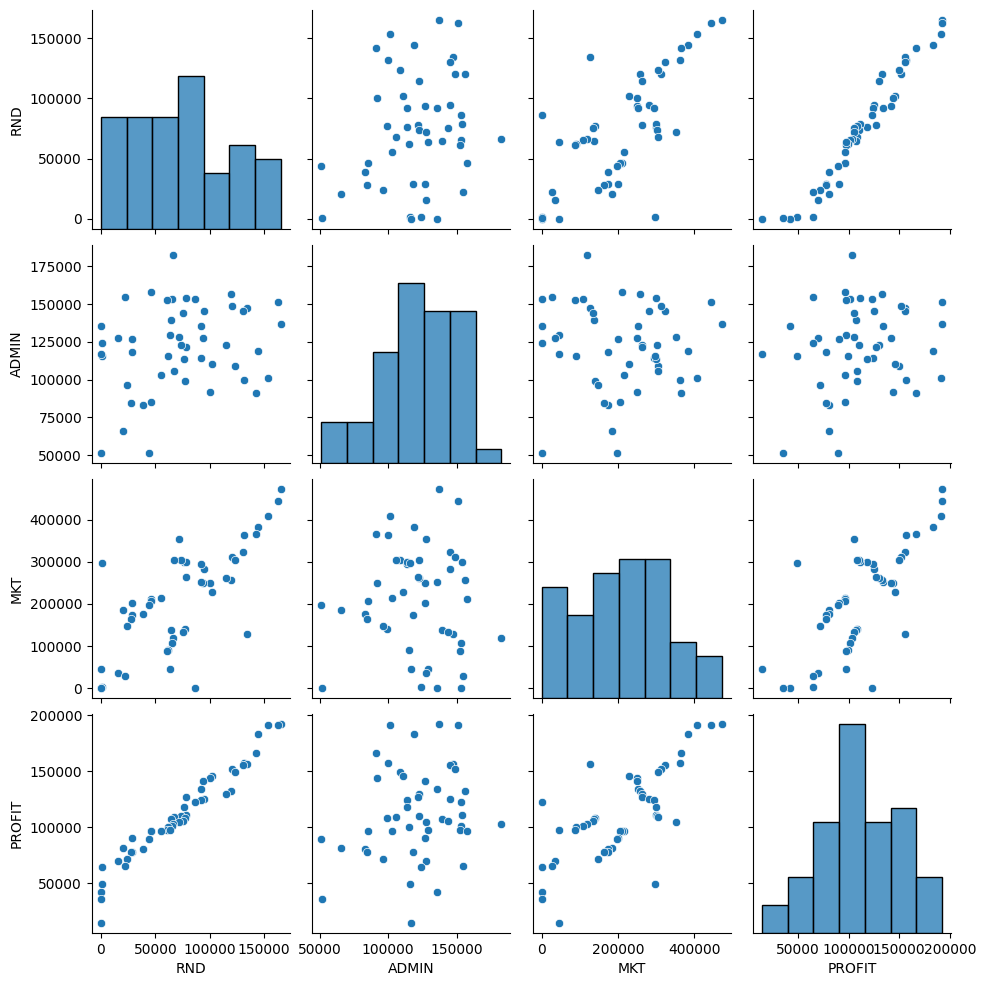

In [12]:
sns.pairplot(data=df)

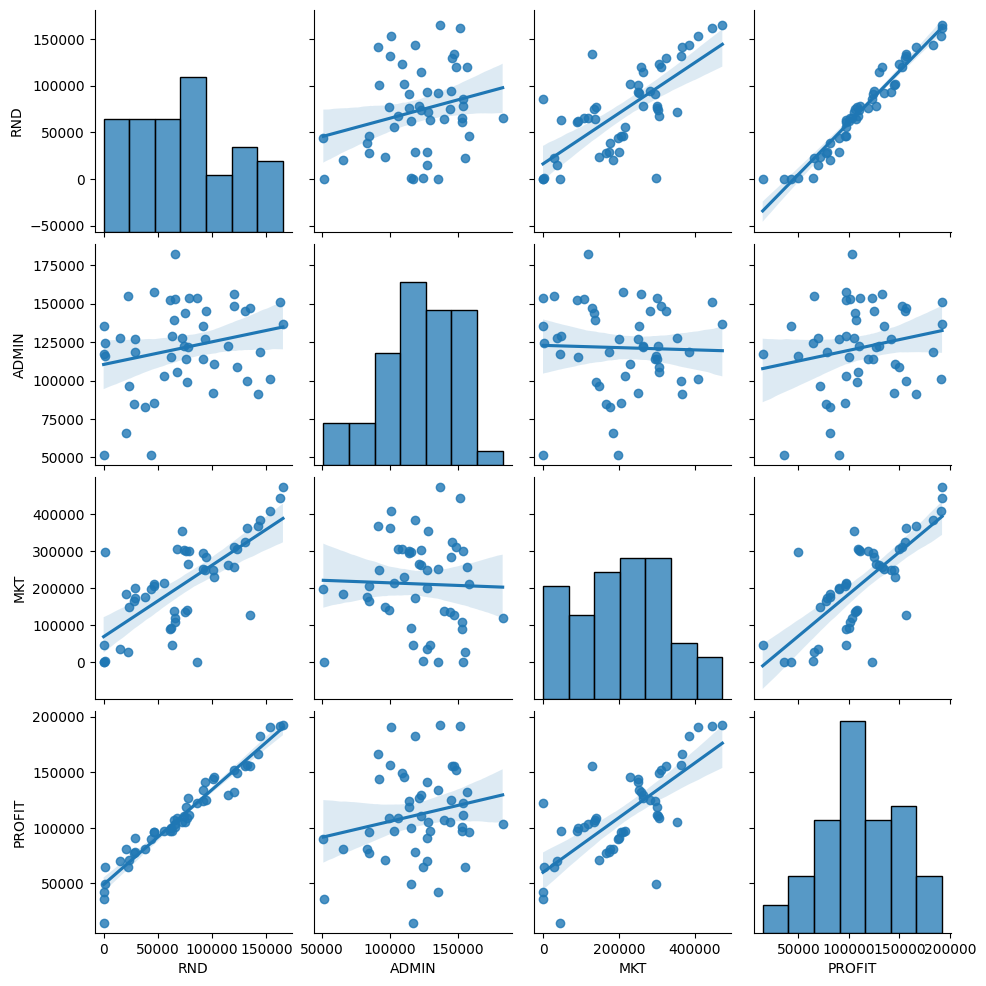

In [13]:
sns.pairplot(data=df, kind= 'reg')

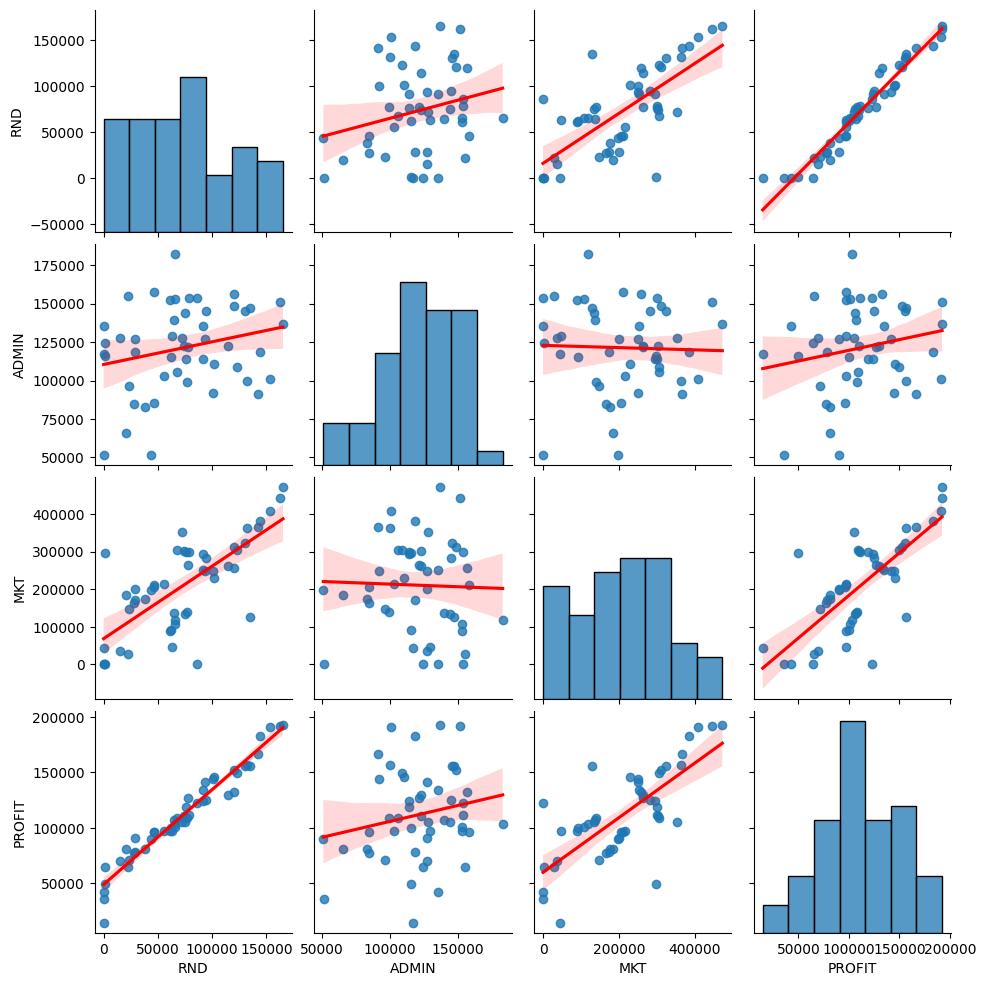

In [14]:
sns.pairplot(data=df, kind= "reg" ,plot_kws ={"line_kws": {"color":"red" }})

In [15]:
corr = df.corr(numeric_only=True)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<Axes: >

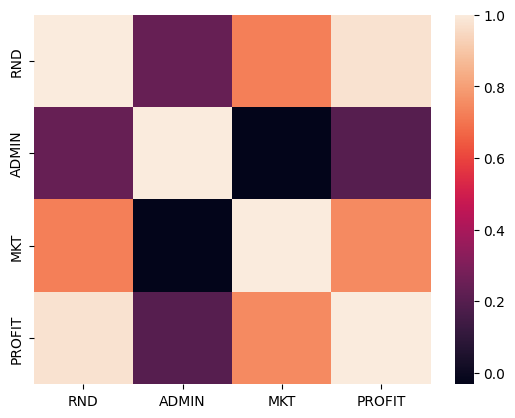

In [16]:
sns.heatmap(data=corr)

<Axes: >

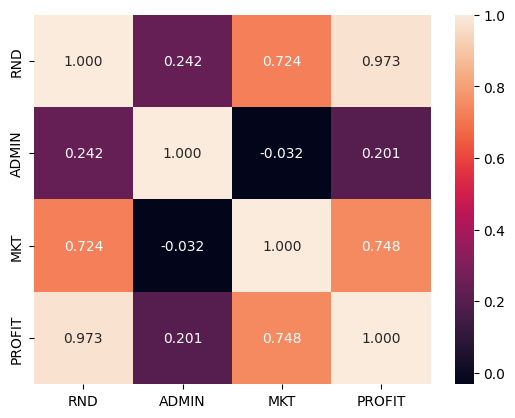

In [17]:
sns.heatmap(data=corr, annot=True, fmt=".3f")

# Simple linear Regression (1 Target feature and 1 Predictor)
1. Profit (Target) ~ RND (Predictor)
2. Profit_pred = B0 + B1*RND
3. B0 - intercept
4. B1 - Coefficient (Slope)

# seperate X and Y

In [18]:
X = df[["RND"]]
Y = df["PROFIT"]

In [19]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [20]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
model1.intercept_

np.float64(49032.89914125215)

In [24]:
model1.coef_

array([0.85429137])

# Profit Predicted =  49032.90 + 0.8543 x RND
Evaluate the model

In [26]:
# R2 score on data
model1.score(X, Y)

0.9465353160804393

<Axes: xlabel='RND', ylabel='PROFIT'>

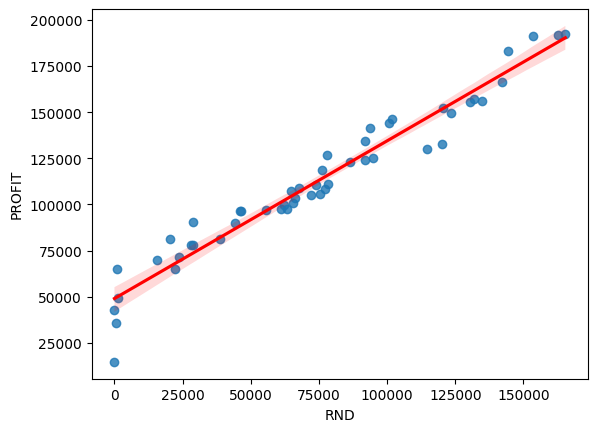

In [27]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

In [28]:
# Predictions given by straight line
preds = model1.predict(X)
preds[0:5]

array([190289.29389289, 187938.71118575, 180116.65707807, 172369.00320589,
       170433.97345032])

In [29]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [31]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)


def evaluate_model(model, x, y):
    # Predict results for x
    ypred = model.predict(x)
    # Calulate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print above results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [32]:
evaluate_model(model1, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 : 94.65%


Above clearly shows that model is good and can be used for out of sample prediction


In [33]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [34]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [35]:
# estimating profit for any RND value
rnd = 2_50_000
profit_pred = model1.predict([[rnd]])
print(profit_pred)

[262605.74187595]


In [36]:
X.describe()

,RND
count,50.000000
mean,73721.615600
std,45902.256482
min,0.000000
25%,39936.370000
50%,73051.080000
75%,101602.800000
max,165349.200000


# Multiple Linear Regression
Single Target ~ Multiple Predictors (PROFIT ~ RND, ADMIN, MKT)
PROFIT = B0 + B1xRND + B2xADMIN + B3xMKT

In [37]:
# Multiple PRedictors
X = df[["RND", "ADMIN", "MKT"]]
Y = df["PROFIT"]

In [38]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [39]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [40]:
model2 = LinearRegression()
model2.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


`LinearRegression()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [42]:
model2.intercept_

np.float64(50122.192989865274)

In [43]:
model2.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [44]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [45]:
coefs = pd.Series(model2.coef_, index=X.columns)
coefs

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

Profit_pred = 50122.19 + 0.8057 x RND -0.0268x ADMIN + 0.0272xMKT

<Axes: >

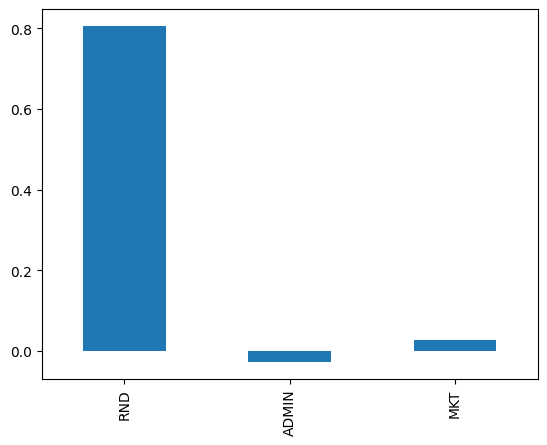

In [46]:
coefs.plot(kind="bar")

R2 score > 0.8 hence model is good and can be used for out of sample prediction

In [47]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [48]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [49]:
rnd = 1_20_000
mkt = 30_000
admin = 50_000

profit_pred = model2.predict([[rnd, admin, mkt]])
print(profit_pred)

[146284.04250404]
